In [9]:
import numpy as np
from scipy.integrate import odeint
import plotly.graph_objects as go
import Inicia as ini

# Concentracoes iniciais
cmin, cmax = ini.concentrations()

# Saturacoes inciais a esquerda no plano cl
# ul, vl, cl = ini.Ul()

# Saturacoes iniciais a direita no plano cr
# ur, vr, cr = ini.Ur()
"""
# Viscosidades
muwl = ini.muw(cl)
muwr = ini.muw(cr)

"""
muw0, muo, mug = ini.viscosidades()

# Define the viscosity functions
def muw(c):
    # Viscosity of water
    return muw0 + c

def muwc(c):
    # dmuw/dc
    return 1.0

# Define the denominator function
def D(u, v, c):
    # Denominator
    w = 1 - u - v
    return u**2 / muw(c) + v**2 / muo + w**2 / mug

# Define the partial derivatives of D
def Du(u, v, c):
    # dD/du
    w = 1 - u - v
    return 2 * u / muw(c) - 2 * w / mug

def Dv(u, v, c):
    # dD/dv
    w = 1 - u - v
    return 2 * v / muo - 2 * w / mug

def Dc(u, v, c):
    # dD/dc
    return -muwc(c) * u**2 / muw(c) ** 2
# Define the functions f, g, and a
def f(u, v, c):
    return (u ** 2 / muw(c)) / D(u, v, c)


def g(u, v, c):
    return (v ** 2 / muo) / D(u, v, c)


def a(c):
    return c **0.5


def fw(u, v, c):
    # fw
    return (u ** 2 / muw(c)) / D(u, v, c)


def fwu(u, v, c):
    # dfw/du
    return (2 * u / muw(c) * D(u, v, c) - u ** 2 / muw(c) * Du(u, v, c)) / (
        D(u, v, c) ** 2
    )


def fwv(u, v, c):
    # dfw/dv
    return (-(u ** 2) / muw(c) * Dv(u, v, c)) / (D(u, v, c) ** 2)


def fwc(u, v, c):
    # dfw/dc
    return (
        u ** 2
        * (-(muwc(c) / muw(c) ** 2) * D(u, v, c) - Dc(u, v, c) / muw(c))
        / (D(u, v, c) ** 2)
    )


def fo(u, v, c):
    # fo
    return (v ** 2 / muo) / D(u, v, c)


def fou(u, v, c):
    # dfo/du
    return (-(v ** 2) / muo) * Du(u, v, c) / (D(u, v, c) ** 2)


def fov(u, v, c):
    # dfo/dv
    return (2 * v / muo * D(u, v, c) - v ** 2 / muo * Dv(u, v, c)) / (
        D(u, v, c) ** 2
    )


def foc(u, v, c):
    # dfo/dc
    return -(v ** 2) / muo * Dc(u, v, c) / (D(u, v, c) ** 2)


def fg(u, v, c):
    # fg
    w = 1 - u - v
    return (w ** 2 / mug) / D(u, v, c)


def fgu(u, v, c):
    # dfg/du
    w = 1 - u - v
    return (-2 * w / mug * D(u, v, c) - w ** 2 / mug * Du(u, v, c)) / (
        D(u, v, c) ** 2
    )


def fgv(u, v, c):
    # dfg/dv
    w = 1 - u - v
    return (-2 * w / mug * D(u, v, c) - w ** 2 / mug * Dv(u, v, c)) / (
        D(u, v, c) ** 2
    )


def fgc(u, v, c):
    # dfg/dv
    w = 1 - u - v
    return (-(w ** 2) / mug * Dc(u, v, c)) / (D(u, v, c) ** 2)

# Define the right-hand side of the system of ODEs
def model(y, t, f, g, a, fR, uR, gR, vR, cR, sigma):
    u, v, c = y
    du_dt = f(u, v, c) - sigma*u - (fR - sigma*u) * (u - uR)
    dv_dt = g(u, v, c) - sigma * v - (gR - sigma*v) * (v - vR)
    dc_dt = sigma * (a(c) - a(cR)) + (fR - sigma*u) * (c - cR)
    return [du_dt, dv_dt, dc_dt]

# Set the parameter values

uR = 0.2
vR = 0.3
cR = 0.4
fR = f(uR, vR, cR)
gR = g(uR, vR, cR)
aR = a(cR)
sigma = fR / uR
  


# Set the initial conditions u0 + v0 <=1, 0 <=c0 <=1
u0 = 0.6
v0 = 0.8
c0 = 0.2

y0 = [u0, v0, c0] # insert initial values for u, v, and c here

T = 10 # insert value for T here
N = 100 # insert value for N here
# Set the time points at which to solve the system
t = np.linspace(0, T, N) # insert values for T and N here

# Solve the system of ODEs
sol = odeint(model, y0, t, args=(f, g, a, fR, uR, gR, vR, cR, sigma))

# Extract the solutions for u, v, and c
u = sol[:,0]
v = sol[:,1]
c = sol[:,2]
# Plot the solutions
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=c, y=v, z=u, mode='lines', name='3D Curve'))
# Add the red ball at the initial point
fig.add_trace(go.Scatter3d(x=[c0], y=[v0], z=[u0], mode='markers', marker=dict(size=5, color='red'), name='Initial Point'))
fig.show()




In [4]:
fig_uc = go.Figure()
fig_uc.add_shape(
    type="line",
    x0=0,
    y0=0.0,
    x1=1,
    y1=0.0,
    line=dict(color="red", width=2),
)
fig_uc.add_shape(
    type="line",
    x0=0,
    y0=1.0,
    x1=0,
    y1=0.0,
    line=dict(color="red", width=2),
)

fig_uc.add_trace(go.Scatter(x=u, y=c, mode='lines', name='uc'))
# Add the red point at the initial point
fig_uc.add_trace(go.Scatter(x=[u0], y=[c0], mode='markers', marker=dict(size=8, color='red'), name='Initial Point'))

fig_uc.show()

In [5]:
fig_vc = go.Figure()
fig_vc.add_shape(
    type="line",
    x0=0,
    y0=0.0,
    x1=1,
    y1=0.0,
    line=dict(color="red", width=2),
)
fig_vc.add_shape(
    type="line",
    x0=0,
    y0=1.0,
    x1=0,
    y1=0.0,
    line=dict(color="red", width=2),
)

fig_vc.add_trace(go.Scatter(x=v, y=c, mode='lines', name='vc'))
fig_vc.add_trace(go.Scatter(x=[v0], y=[c0], mode='markers', marker=dict(size=8, color='red'), name='Initial Point'))

fig_vc.show()

In [6]:
fig_uv = go.Figure()
fig_uv.add_shape(
    type="line",
    x0=0,
    y0=0.0,
    x1=1,
    y1=0.0,
    line=dict(color="red", width=1),
)
fig_uv.add_shape(
    type="line",
    x0=0,
    y0=1.0,
    x1=0,
    y1=0.0,
    line=dict(color="red", width=1),
)

fig_uv.add_trace(go.Scatter(x=u, y=v, mode='lines', name='uv'))
fig_uv.add_trace(go.Scatter(x=[u0], y=[v0], mode='markers', marker=dict(size=8, color='red'), name='Initial Point'))

fig_uv.show()

0.24912622508269416


(0.0, 1.0)

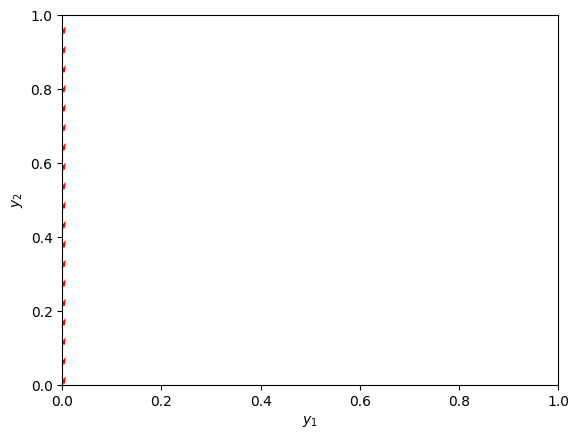

In [7]:
import numpy as np
import matplotlib.pyplot as plt
print(sol[99][0])
def f(Y, t):
    y1, y2 = Y
    return [y2, -np.sin(y1)]

y1 = np.linspace(0, 20, 20)
y2 = np.linspace(0, 1, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        u[i,j] = sol[j][0]
        v[i,j] = sol[j][1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([0, 1])
plt.ylim([0, 1])

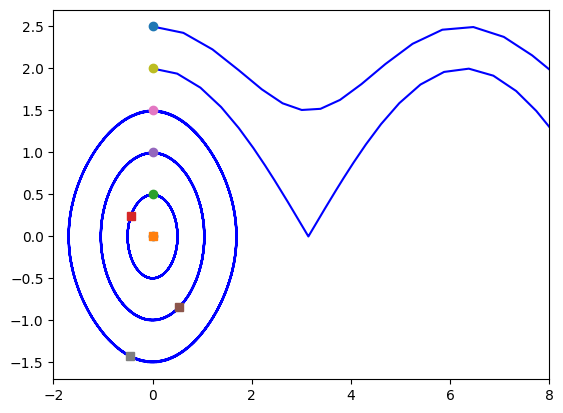

In [8]:
from scipy.integrate import odeint

for y20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 50, 200)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.xlim([-2, 8])
plt.show()